# 1. Import the necessary libraries 

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
from scipy import stats

In [8]:
import seaborn as sns

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
import researchpy as rp

# 2. Read the data as a data frame 

In [12]:
dataframe=pd.read_csv('insurance.csv')

In [13]:

dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Perform basic EDA which should include the following and print out your insights at every step

# a. Shape of the data

In [14]:
dataframe.shape # this will shows the number of rows and number of column in dtataframe

(1338, 7)

# b. Data type of each attribute 

In [15]:
dataframe.dtypes # will show you the data types of each atttribute in data frame

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# c. Checking the presence of missing values 

In [16]:


dataframe.isnull().sum()  # this show if  there any null value in datarame ,if it is there it will sum all the null ,as in this case you can see no null value.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# d. 5 point summary of numerical attributes 

In [17]:
dataframe.describe() # describe method will show the 5 point summary of numerical attributes

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

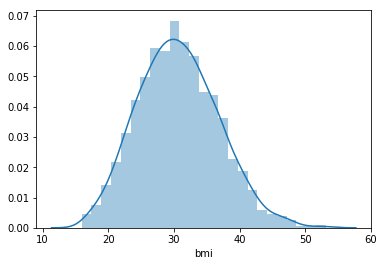

In [18]:
sns.distplot(dataframe['bmi'])  # this is a distrubution of  'bmi' varibale  with kde 

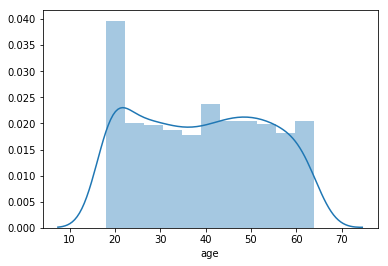

In [19]:
sns.distplot(dataframe['age'])# this is a distrubution of  'age' varibale  with kde 

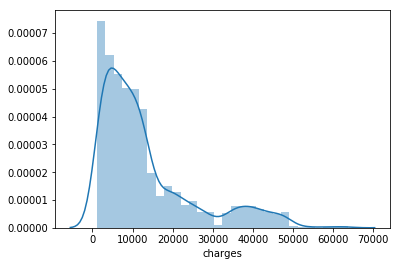

In [20]:
sns.distplot(dataframe['charges'])# this is a distrubution of  'charges' varibale  with kde 

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns - ​optional  

In [21]:
dataframe.skew()  # will show you the skewness of each column

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns - ​optional 

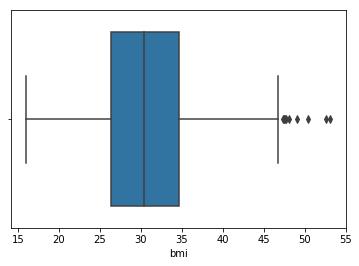

In [22]:
sns.boxplot(dataframe['bmi'])  # thsi will show the outliers of BMI variable

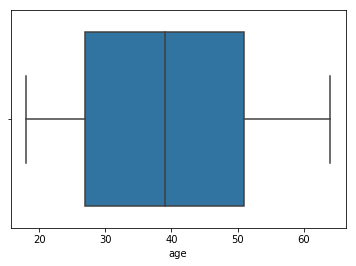

In [23]:





sns.boxplot(dataframe['age'])  # thsi will show the outliers of AGE variable,as you can see no outliers found in this.

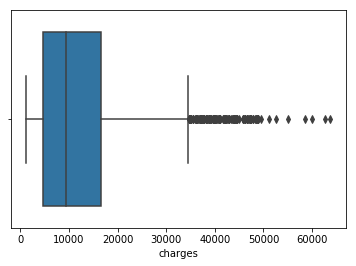

In [24]:

sns.boxplot(dataframe['charges']) # thsi will show the outliers of CHARGES variable

# h. Distribution of categorical columns (including children) 

In [56]:
gender=dataframe['sex'].value_counts()

In [57]:
gender

male      676
female    662
Name: sex, dtype: int64

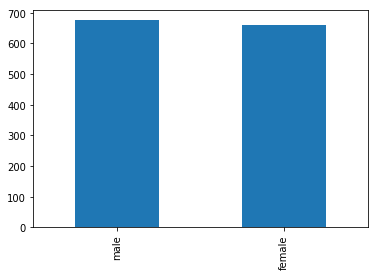

In [63]:
gender.plot(kind='bar') #distribution of categorical variable 'gender'

In [64]:
region=dataframe['region'].value_counts()

In [65]:
region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

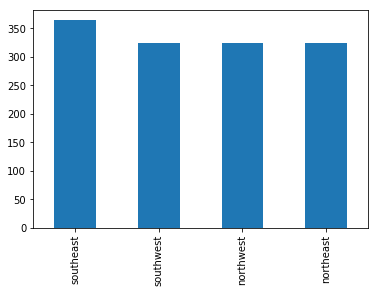

In [66]:
region.plot(kind='bar') #it shows the distrubtion of categorical varibale 'region'

In [67]:
children=dataframe['children'].value_counts()

In [68]:
children

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

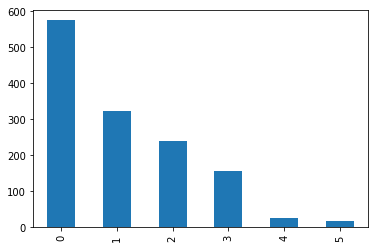

In [69]:
children.plot(kind='bar') #it shows the distrubtion of categorical varibale 'children'

# The following shows the distribution across differnt catagorical variables(optional )

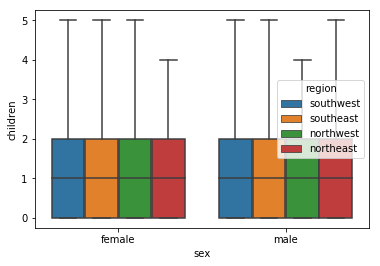

In [26]:
sns.boxplot(x='sex',y='children',data=dataframe,hue='region',) # it shows distrubution of  varible 'sex' by no of children and region wise

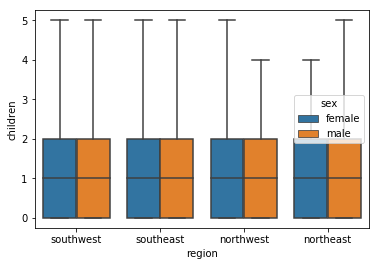

In [27]:
sns.boxplot(x='region',y='children',data=dataframe,hue='sex')# it shows distrubution of  varible 'region' by no of children and by 'sex 'catagory

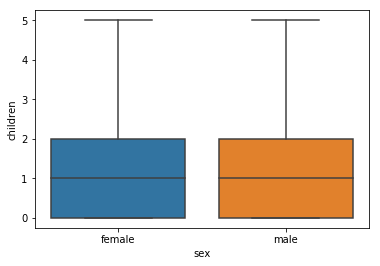

In [28]:
sns.boxplot(x='sex',y='children',data=dataframe) #distribution of 'sex over 'children'

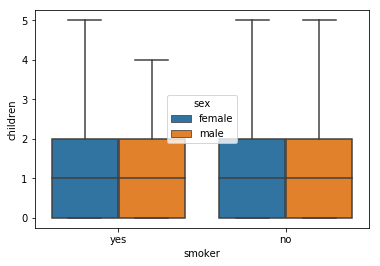

In [29]:
sns.boxplot(x='smoker',y='children',data=dataframe,hue='sex')

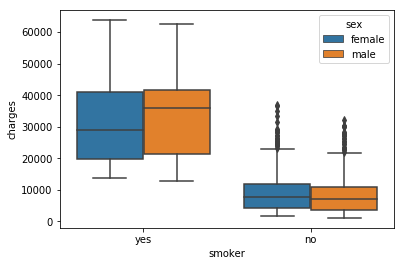

In [30]:
sns.boxplot(x='smoker',y='charges',data=dataframe,hue='sex')#it shows how 'smoker' impacts diffrent medcial 'charges' divded by 'sex' catogory

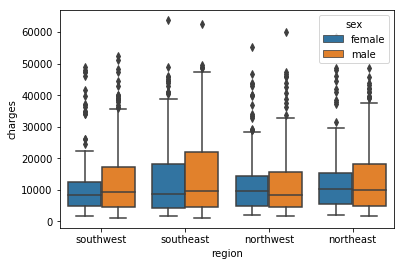

In [31]:

sns.boxplot(x='region',y='charges',data=dataframe,hue='sex') #it shows  by the region how medical cost 'charges'  spread over by 'sex' catagory' 

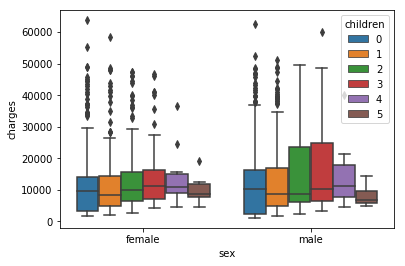

In [32]:
sns.boxplot(x='sex',y='charges',data=dataframe,hue='children')

# i.Pair plot that includes all the columns of the data frame  

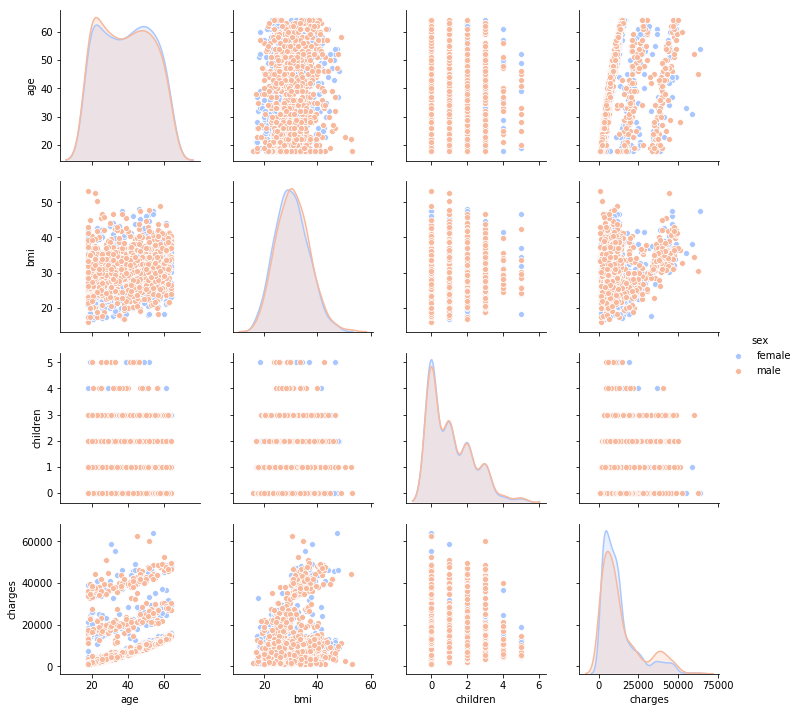

In [33]:
sns.pairplot(dataframe,hue='sex',palette='coolwarm') # it shows pairplot of dataframe 

# 4. Answer the following questions with statistical evidence 




# a. Do charges of people who smoke differ significantly from the people who don't? 

To test the diffrence between two independpendent variable we will conduct independent  t test to se if there is any significant diffrence between to independent variables

Before that we need to establish our Hypothisis

NULL HYPOTHISIS(HO): MEAN CHARGES OF SMOKER=MEAN CHARGES OF NONSMOKER
ALTRENATIVE HYPOTHIS(H1): MEAN CHARGES OF SMOKER ? MEAN CHARGES OF NONSMOKER

In [112]:
rp.summary_cont(dataframe.groupby("smoker")['charges'])

,N,Mean,SD,SE,95% Conf.,Interval
smoker,,,,,,
no,1064,8434.268298,5993.781819,183.751171,8073.946638,8794.589957
yes,274,32050.231832,11541.547176,697.250364,30681.120456,33419.343207


In [36]:
dataframe.groupby("smoker")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [37]:
#as from above descrptive stats you can see there is diffrence between mean and count of smoker catagory

In [38]:
smokeryes = dataframe[(dataframe['smoker'] == 'yes')]
smokeryes.reset_index(inplace= True)

smokerno = dataframe[(dataframe['smoker'] == 'no')]
smokerno.reset_index(inplace= True)


In [39]:
stats.levene(smokeryes['charges'], smokerno['charges']) # we are checking the equlity of variance 

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [70]:
stats.ttest_ind(smokeryes['charges'],smokerno['charges']) #paramtric test of twoindependent groups

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [71]:
stats.mannwhitneyu(smokeryes['charges'],smokerno['charges'])# non paramtric test for tow independent groups

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

From the above t test and mantwhitney u  test shows  with confidence level of 95%  ,p value of test comes out nearly 0, and we reject null hypothis ,we have enough  eividnace to reject null hypthisis ,where null says  MEAN CHARGES OF SMOKER=MEAN CHARGES OF NONSMOKER,here we embrace alternative hypothis.

# b. Does bmi of males differ significantly from that of females? 

#first we need to establish null hypothesis and alternatve hypothesis,

null hypothesis   :  h0: mean bmi of male= mean bmi of female 


Alterntaive Hypothesis :  h1: mean bmi of male ? mean bmi of female 


In [42]:
male = dataframe[(dataframe['sex'] == 'male')]
male.reset_index(inplace= True)

female = dataframe[(dataframe['sex'] == 'female')]
female.reset_index(inplace= True)

In [43]:
descriptives, results = rp.ttest(male['bmi'], female['bmi'])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,bmi,676.0,30.943129,6.140435,0.236171,30.479411,31.406846
1,bmi,662.0,30.377749,6.046023,0.234985,29.916342,30.839157
2,combined,1338.0,30.663397,6.098187,0.166714,30.336347,30.990447


In [44]:
results

,Independent t-test,results
0,Difference (bmi - bmi) =,0.5654
1,Degrees of freedom =,1336.0000
2,t =,1.6968
3,Two side test p value =,0.0900
4,Mean of bmi > mean of bmi p value =,0.9550
5,Mean of bmi < mean of bmi p value =,0.0450
6,Cohen's d =,0.0928
7,Hedge's g =,0.0927
8,Glass's delta =,0.0921
9,r =,0.0464


In [75]:
stats.levene(male['bmi'],female['bmi']) #checking the homogeneity of two difrent groups,as you can see p value is greater than .05 and equal variances is being assumed

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

In [45]:
stats.ttest_ind(male['bmi'], female['bmi'])# independemt ttesy shows pvalue more than 0.05 signficant value

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

In the above case we failed to reject null hypothisis  as p value more than significant value 0.05  and we embrace null,where null hypothysis says , mean bmi of male= mean bmi of female and it shows that there is no significant diffrence


conclusion:mean bmi of male is likely to be same of mean bmi of female

# c. is the proportion of smokers significantly different in different genders? 

first we need to choose proper  statistic test to use
Here in this case we use chis quare test since both varibles are categorical in nature

then after we need establish our null and alternate hypothesis

Null hypothesis :  h0: propotion of smoker eqal across genders



alternate hypothesis :  h1: propotion of smoker significant across genders
        

In [46]:
pd.crosstab(dataframe['smoker'],dataframe['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [47]:
from scipy.stats import chi2_contingency

In [48]:
chi2_contingency(pd.crosstab(dataframe['smoker'],dataframe['sex']))# p value comes out to be more than significant value 0.05

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

In the above case p value is more than significant value 0.05, that is 0.06  and here we failed to reject our null hypothesis,where null says  propotion of smoker likely to  eqal across genders and here we embrace null hypothesis

conclusion :propotion of smoker likely to  eqal across genders


# d. Is the distribution of bmi across women with no children, one child and two children, the same ? 
 

we need to choose statistic test to use ,here  we use anova test on way anova

the we will establish our null and alternate hypothesis

Null hypothesis:  h0: distirbution of bmi across women(with no child,one child,two child) is same.
Alternate  hypothesis:  h1: distirbution of bmi across women(with no child,one child,two child) is not equal.

In [49]:
womennochild=dataframe[(dataframe['sex']=='female') & (dataframe['children']==0)]

In [50]:
zero=womennochild['bmi']


In [51]:
womenonechild=dataframe[(dataframe['sex']=='female') & (dataframe['children']==1)]

In [52]:
one=womenonechild['bmi']

In [53]:
womentwochild=dataframe[(dataframe['sex']=='female') & (dataframe['children']==2)]

In [54]:
two=womentwochild['bmi']

In [55]:
stats.f_oneway(zero, one, two)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In the above case p value comes ot to be more than our significant value 0.05 ,and p vale is 0.71 ,here we failed to reject null hypothesis,where null hypothesis says distirbution of bmi across women(with no child,one child,two child) is same. and we have enough eviidence to accept null hypothis,



conclusioon: distirbution of bmi across women(with no child,one child,two child) is likely to be same